vocabulary size:  144653
######## RESULT: phone_1_500_500
Accuracy:0.4016
Precision:0.44732758184728655
Recall: 0.4016
F1:0.40854276083514474
              precision    recall  f1-score   support

     class_1       0.61      0.32      0.42       250
     class_2       0.32      0.38      0.35       250
     class_3       0.29      0.47      0.36       250
     class_4       0.36      0.31      0.33       250
     class_5       0.66      0.53      0.59       250

    accuracy                           0.40      1250
   macro avg       0.45      0.40      0.41      1250
weighted avg       0.45      0.40      0.41      1250



Text(0.5, 1.0, 'phone_1_500_500_normalize')

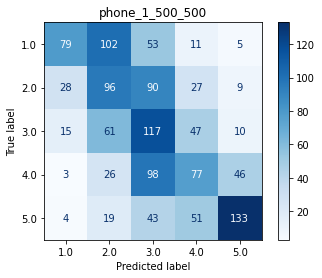

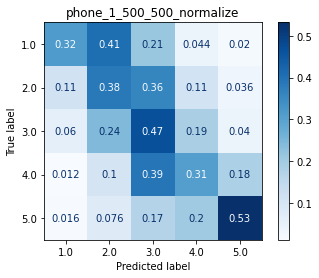

In [1]:
from Scripts import loading as dl
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix, classification_report
import matplotlib.pyplot as plt

domain='phone'
trial = 1
schema_rev_link = '../Data/schema_phone.pkl'
amazon_rev_link = '../Data/amazon_phone.pkl'
schema_rev_size = 500
amazon_rev_size = 500
# def run(domain, trial, schema_rev_link, amazon_rev_link, schema_rev_size, amazon_rev_size):
df = dl.load_merged_data(schema_rev_link, amazon_rev_link, schema_rev_size, amazon_rev_size)

text = df.text_prep
target = df.label
target = target.astype('int')

seed = 7
X_train, X_test, y_train, y_test = train_test_split(text, target, test_size=0.25,random_state=seed, stratify=df.label)

vect = TfidfVectorizer(binary=True, max_df=0.75, min_df=1, ngram_range=(1,2))
train_vectorized = vect.fit_transform(X_train)
vocab = vect.get_feature_names()
print ("vocabulary size: ", len(vocab))
test_vectorized = vect.transform(X_test)

vectorizer_fs = SelectKBest(score_func=f_classif, k=500)
fs_train_vectorized = vectorizer_fs.fit_transform(train_vectorized, y_train)
fs_test_vectorized = vectorizer_fs.transform(test_vectorized)

clf = SVC(C=1.0, decision_function_shape='ovo', gamma='auto', kernel='linear')

clf.fit(fs_train_vectorized, y_train)


y_pred = clf.predict(fs_test_vectorized)


print(f"######## RESULT: {domain}_{trial}_{schema_rev_size}_{amazon_rev_size}")
accuracy = str(metrics.accuracy_score(y_test , y_pred))
precision = str(metrics.precision_score(y_test, y_pred, average="macro"))
recall = str(metrics.recall_score(y_test, y_pred, average="macro"))
f1 = str(metrics.f1_score(y_test , y_pred, average="macro"))
print("Accuracy:" + accuracy)
print("Precision:" + precision)
print("Recall: " + recall)
print("F1:" + f1)
print(classification_report(y_test, y_pred, target_names=['class_1', 'class_2', 'class_3', 'class_4', 'class_5']))
title = f"{domain}_{trial}_{schema_rev_size}_{amazon_rev_size}"
disp = plot_confusion_matrix(clf, fs_test_vectorized, y_test,
                             display_labels=[1.0, 2.0, 3.0, 4.0, 5.0],
                             cmap=plt.cm.Blues)
disp.ax_.set_title(title)
# plt.savefig(f'Results/test_series/{title}.png', dpi=200)

title_norm = title + "_normalize"
disp_norm = plot_confusion_matrix(clf, fs_test_vectorized, y_test,
                             display_labels=[1.0, 2.0, 3.0, 4.0, 5.0],
                             cmap=plt.cm.Blues,
                             normalize='true')
disp_norm.ax_.set_title(title_norm)
# plt.savefig(f'Results/test_series/{title_norm}.png', dpi=200)


In [9]:
case_1 = 0
case_2 = 0
case_3 = 0
case_4 = 0
case_5 = 0
case_6 = 0
case_7 = 0
case_8 = 0
for (input_text, pred, label) in zip(X_test, y_pred, y_test):
    # if pred == 3.0 and label in [1.0,2.0,4.0,5.0]:
        # case_1 += 1
    # if pred in [1.0,2.0,4.0,5.0] and label == 3.0:
        # case_2 += 1
    # if pred in [1.0,2.0] and label in [4.0,5.0]:
#         case_3 += 1
#     if pred in [4.0,5.0] and label in [1.0,2.0]:
#         case_4 += 1
#     if pred == 1.0 and label == 2.0:
#         case_5 += 1
#     if pred == 2.0 and label == 1.0:
#         case_6 += 1
#     if pred == 4.0 and label == 5.0:
#         case_7 += 1
    if pred == 5.0 and label == 4.0:
        print(pred, label, input_text)
#         case_8 += 1
# print('')
# print('case_1','case_2','case_3','case_4','case_5','case_6','case_7','case_8')
# print(case_1, case_2, case_3, case_4, case_5, case_6, case_7, case_8)

#     return f1
#
# run('phone', 1, '../Data/schema_phone.pkl', '../Data/amazon_phone.pkl', 500, 500)

5 4 got recent not comment durabl but produc great sound money comfort would recommend time see long last daili use
5 4 n u cwe enjoy work back action uk u physiotherapist format manual handl risk assess report u highli commend u n
5 4 describ love ship much faster expect veri much worth price similar case may also purchas
5 4 recent purchas second lifeproof case protect previou phone year especi drop seem like case even lighter less bulki last one love
5 4 love product fit phone well feel lot better phone protect number peopl admir cover
5 4 job perfect protect phone easi appli phone
5 4 enjoy aura led blacklight time turn turn whole room glow awesom
5 4 good solid product n post
5 4 love case everyth want realli worth everi penni
5 4 bought headphon multipl time often misplac due fault headphon great recommend
5 4 like case look nice one problem fingerprint hole small not use read fingerprint veri small hand case veri nice sc
5 4 good fit phone perfectli
5 4 great price case got one 

In [ ]:
print('######### Versuchsreihe 1')
count_versuch = 1
domains = ['phone', 'movie']
for d in domains:
    limit= 1000
    schema_size = 0
    amazon_link = f'../Data/amazon_{d}.pkl'
    schema_link = f'../Data/schema_{d}.pkl'

    print(f"{d}, test series {count_versuch}")
    while schema_size <= 1000:
        amazon_size = limit - schema_size
        print(schema_link, amazon_link, schema_size, amazon_size)
        schema_size = schema_size + 250
        amazon_size = limit - schema_size



In [31]:
print('######### Versuchsreihe 2')
count_versuch = 2
limit= 2000
schema_size = 1000
amazon_size = limit - schema_size
domains = ['phone', 'movie']
for d in domains:
    amazon_link = f'../Data/amazon_{d}.pkl'
    schema_link = f'../Data/schema_{d}.pkl'
    print(f"{d}, test series {count_versuch}")
    while schema_size < 2000:
        print(schema_link, amazon_link, schema_size, amazon_size) #run everything
        schema_size = schema_size + 200
        amazon_size = limit - schema_size
    limit = 2000
    schema_size = 1000
    amazon_size = limit - schema_size

######### Versuchsreihe 2
phone, test series 2
../Data/schema_phone.pkl ../Data/amazon_phone.pkl 1000 1000
../Data/schema_phone.pkl ../Data/amazon_phone.pkl 1200 800
../Data/schema_phone.pkl ../Data/amazon_phone.pkl 1400 600
../Data/schema_phone.pkl ../Data/amazon_phone.pkl 1600 400
../Data/schema_phone.pkl ../Data/amazon_phone.pkl 1800 200
movie, test series 2
../Data/schema_movie.pkl ../Data/amazon_movie.pkl 1000 1000
../Data/schema_movie.pkl ../Data/amazon_movie.pkl 1200 800
../Data/schema_movie.pkl ../Data/amazon_movie.pkl 1400 600
../Data/schema_movie.pkl ../Data/amazon_movie.pkl 1600 400
../Data/schema_movie.pkl ../Data/amazon_movie.pkl 1800 200


In [37]:
print('######### Versuchsreihe 2.1')
count_versuch = 2
domains = ['phone', 'movie']
for d in domains:
    limit= 2000
    schema_size = 1000
    amazon_link = f'../Data/amazon_{d}.pkl'
    schema_link = f'../Data/schema_{d}.pkl'
    print(f"{d}, test series {count_versuch}")
    while schema_size >= 0:
        amazon_size = limit - schema_size
        print(schema_link, amazon_link, schema_size, amazon_size) #run everything
        schema_size = schema_size - 200


######### Versuchsreihe 2.1
phone, test series 2
../Data/schema_phone.pkl ../Data/amazon_phone.pkl 1000 1000
../Data/schema_phone.pkl ../Data/amazon_phone.pkl 800 1200
../Data/schema_phone.pkl ../Data/amazon_phone.pkl 600 1400
../Data/schema_phone.pkl ../Data/amazon_phone.pkl 400 1600
../Data/schema_phone.pkl ../Data/amazon_phone.pkl 200 1800
../Data/schema_phone.pkl ../Data/amazon_phone.pkl 0 2000
movie, test series 2
../Data/schema_movie.pkl ../Data/amazon_movie.pkl 1000 1000
../Data/schema_movie.pkl ../Data/amazon_movie.pkl 800 1200
../Data/schema_movie.pkl ../Data/amazon_movie.pkl 600 1400
../Data/schema_movie.pkl ../Data/amazon_movie.pkl 400 1600
../Data/schema_movie.pkl ../Data/amazon_movie.pkl 200 1800
../Data/schema_movie.pkl ../Data/amazon_movie.pkl 0 2000


In [8]:
print('######### Versuchsreihe 3')
count_versuch = 3

domains = ['phone', 'movie']
for d in domains:
    limit= 10000
    schema_size = 0
    amazon_link = f'../Data/amazon_{d}.pkl'
    schema_link = f'../Data/schema_{d}.pkl'
    print(f"{d}, test series {count_versuch}")
    while schema_size <= 1000:
        amazon_size = limit - schema_size
        print(schema_link, amazon_link, schema_size, amazon_size) #run everything
        schema_size = schema_size + 100

######### Versuchsreihe 3
phone, test series 3
../Data/schema_phone.pkl ../Data/amazon_phone.pkl 0 10000
../Data/schema_phone.pkl ../Data/amazon_phone.pkl 100 9900
../Data/schema_phone.pkl ../Data/amazon_phone.pkl 200 9800
../Data/schema_phone.pkl ../Data/amazon_phone.pkl 300 9700
../Data/schema_phone.pkl ../Data/amazon_phone.pkl 400 9600
../Data/schema_phone.pkl ../Data/amazon_phone.pkl 500 9500
../Data/schema_phone.pkl ../Data/amazon_phone.pkl 600 9400
../Data/schema_phone.pkl ../Data/amazon_phone.pkl 700 9300
../Data/schema_phone.pkl ../Data/amazon_phone.pkl 800 9200
../Data/schema_phone.pkl ../Data/amazon_phone.pkl 900 9100
../Data/schema_phone.pkl ../Data/amazon_phone.pkl 1000 9000
movie, test series 3
../Data/schema_movie.pkl ../Data/amazon_movie.pkl 0 10000
../Data/schema_movie.pkl ../Data/amazon_movie.pkl 100 9900
../Data/schema_movie.pkl ../Data/amazon_movie.pkl 200 9800
../Data/schema_movie.pkl ../Data/amazon_movie.pkl 300 9700
../Data/schema_movie.pkl ../Data/amazon_movie.pk

In [9]:
print('######### Versuchsreihe 4')
count_versuch = 4
limit= 1000
domains = ['phone', 'movie']
for d in domains:
    amazon_link = f'../Data/amazon_{d}.pkl'
    schema_link = f'../Data/schema_{d}.pkl'
    print(f"{d}, test series {count_versuch}")
    while limit >= 500:
        print(schema_link, amazon_link, limit, limit) #run everything
        limit = limit -100
    limit = 1000


######### Versuchsreihe 4
phone, test series 4
../Data/schema_phone.pkl ../Data/amazon_phone.pkl 1000 1000
../Data/schema_phone.pkl ../Data/amazon_phone.pkl 900 900
../Data/schema_phone.pkl ../Data/amazon_phone.pkl 800 800
../Data/schema_phone.pkl ../Data/amazon_phone.pkl 700 700
../Data/schema_phone.pkl ../Data/amazon_phone.pkl 600 600
../Data/schema_phone.pkl ../Data/amazon_phone.pkl 500 500
movie, test series 4
../Data/schema_movie.pkl ../Data/amazon_movie.pkl 1000 1000
../Data/schema_movie.pkl ../Data/amazon_movie.pkl 900 900
../Data/schema_movie.pkl ../Data/amazon_movie.pkl 800 800
../Data/schema_movie.pkl ../Data/amazon_movie.pkl 700 700
../Data/schema_movie.pkl ../Data/amazon_movie.pkl 600 600
../Data/schema_movie.pkl ../Data/amazon_movie.pkl 500 500


In [11]:
print('######### Versuchsreihe 5')
count_versuch = 5
domains = ['phone', 'movie']
for d in domains:
    limit= 900
    amazon_link = f'../Data/amazon_{d}.pkl'
    schema_link = f'../Data/schema_{d}.pkl'
    print(f"{d}, test series {count_versuch}")
    while limit >= 500:
        print(schema_link, amazon_link, limit, 0)
        print(schema_link, amazon_link, 0, limit)
        limit = limit -100

# print('######### test series 2')
# count_trial = '2'
# domains = ['phone', 'movie']
# for d in domains:
#     limit = 2000
#     schema_size = 1000
#     amazon_link = f'../Data/amazon_{d}.pkl'
#     schema_link = f'../Data/schema_{d}.pkl'
#     print(f"######## {d}, test series {count_trial}")
#     results = {}
#
#     while schema_size >= 0:
#         amazon_size = limit - schema_size
#         result = run(d, count_trial, schema_link, amazon_link, schema_size, amazon_size)
#         results[f"{d}_{count_trial}_{schema_size}_{amazon_size}"] = result
#         schema_size = schema_size - 200
#
#     bigIndex = max([[results[key], key] for key in results])
#     print(f'######## BEST RESULTS of trial{count_trial}_{d}')
#     print(bigIndex)
#

######### Versuchsreihe 5
phone, test series 5
../Data/schema_phone.pkl ../Data/amazon_phone.pkl 900 0
../Data/schema_phone.pkl ../Data/amazon_phone.pkl 0 900
../Data/schema_phone.pkl ../Data/amazon_phone.pkl 800 0
../Data/schema_phone.pkl ../Data/amazon_phone.pkl 0 800
../Data/schema_phone.pkl ../Data/amazon_phone.pkl 700 0
../Data/schema_phone.pkl ../Data/amazon_phone.pkl 0 700
../Data/schema_phone.pkl ../Data/amazon_phone.pkl 600 0
../Data/schema_phone.pkl ../Data/amazon_phone.pkl 0 600
../Data/schema_phone.pkl ../Data/amazon_phone.pkl 500 0
../Data/schema_phone.pkl ../Data/amazon_phone.pkl 0 500
movie, test series 5
../Data/schema_movie.pkl ../Data/amazon_movie.pkl 900 0
../Data/schema_movie.pkl ../Data/amazon_movie.pkl 0 900
../Data/schema_movie.pkl ../Data/amazon_movie.pkl 800 0
../Data/schema_movie.pkl ../Data/amazon_movie.pkl 0 800
../Data/schema_movie.pkl ../Data/amazon_movie.pkl 700 0
../Data/schema_movie.pkl ../Data/amazon_movie.pkl 0 700
../Data/schema_movie.pkl ../Data/ama

In [ ]:
print('######### Versuchsreihe 1')
count_versuch = 1
limit= 1000
schema_size = 0
amazon_size = limit - schema_size
domains = 'movie'

amazon_link = f'../Data/amazon_{d}.pkl'
schema_link = f'../Data/schema_{d}.pkl'

print(f"{d}, test series {count_versuch}")
while schema_size <= 1000: #run everything
    print(schema_link, amazon_link, schema_size, amazon_size)
    schema_size = schema_size + 250
    amazon_size = limit - schema_size
